In [1]:
import seaborn as sns
import pandas as pd

In [2]:
data = sns.load_dataset('iris')
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [4]:
from sklearn.model_selection import train_test_split
# "target" contains the column name of the classification labels
target = "species"

X = data.drop(target,1)
y = data[target]

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)


In [11]:
# Naive Bayes Classifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = y_pred #[round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.00%


In [13]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(solver='liblinear',multi_class="auto")
reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_pred = reg.predict(X_test)

In [15]:
y_pred

array(['virginica', 'virginica', 'setosa', 'virginica', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa'], dtype=object)

In [16]:
reg.score(X_test,y_test)

0.9

In [17]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9
[[14  0  0]
 [ 0 14  4]
 [ 0  1 17]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.93      0.78      0.85        18
   virginica       0.81      0.94      0.87        18

    accuracy                           0.90        50
   macro avg       0.91      0.91      0.91        50
weighted avg       0.91      0.90      0.90        50



In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from IPython.display import Image
import pydotplus

Accuracy: 92.00%


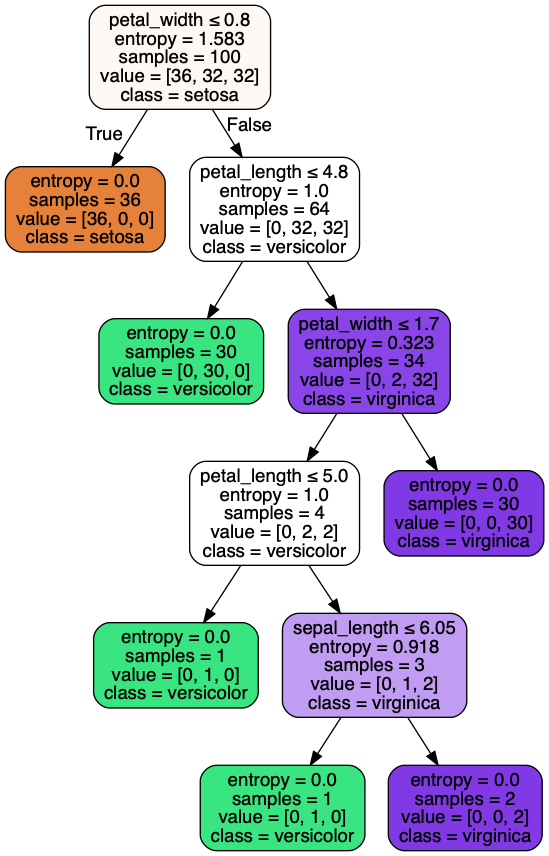

In [19]:

model = DecisionTreeClassifier(
    random_state=3, 
    criterion='entropy',
    splitter='best', 
    max_depth=5, 
    min_samples_split=2)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

# evaluate predictions
accuracy = model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


dot_data = export_graphviz(model,
    feature_names=list(X),
    class_names=sorted(y.unique().astype(str)),
    filled=True, 
    rounded=True, 
    special_characters=True, 
    leaves_parallel=False)
 
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [20]:
y_pred

array(['virginica', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa'], dtype=object)

In [21]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.92
[[14  0  0]
 [ 0 16  2]
 [ 0  2 16]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.89      0.89      0.89        18
   virginica       0.89      0.89      0.89        18

    accuracy                           0.92        50
   macro avg       0.93      0.93      0.93        50
weighted avg       0.92      0.92      0.92        50



In [22]:
seed = 7

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(
    n_estimators=100,
    random_state=seed, 
    criterion='entropy',
    max_depth=None, 
    min_samples_split=2)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

# evaluate predictions
accuracy = model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.00%


In [23]:
y_pred

array(['virginica', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa'], dtype=object)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  0  0]
 [ 0 16  2]
 [ 0  2 16]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.89      0.89      0.89        18
   virginica       0.89      0.89      0.89        18

    accuracy                           0.92        50
   macro avg       0.93      0.93      0.93        50
weighted avg       0.92      0.92      0.92        50



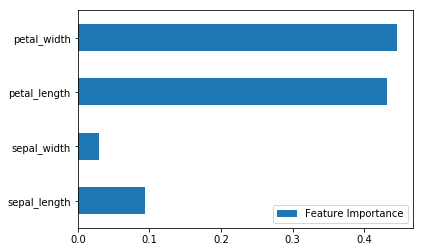

In [25]:
# Check feature importance
feat_importance = model.feature_importances_
pd.DataFrame({'Feature Importance':feat_importance},
            index=list(X)).plot(kind='barh')

##  Cross-validation




### Tuning the model
The model paramters are called _hyperparameters_.  Setting them to appropriate values and running the model experiment again can be tedious, so we have a technique called cross-validation to help with this.

From http://scikit-learn.org/stable/modules/cross_validation.html:

> When evaluating different settings (“hyperparameters”) for estimators, such as the C setting that must be manually set for an SVM, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

> However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

> A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

> A model is trained using  of the folds as training data;
the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).
The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.

The mean score and the 95% confidence interval (2 x the standard deviation) of the score estimate are hence given by:


In [26]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X,y, cv=5)
print("Accuracy: %0.2f%% (+/- %0.2f)" % (scores.mean()*100, scores.std() * 2*100))

Accuracy: 95.33% (+/- 6.80)


But let's say we want to fiddle with the hyperparameters.

To do this, we first set up a parameter grid with the lists of paramters we want to try:

In [27]:
param_grid = {
                 'n_estimators': [5, 10, 15, 20, 25],
                 'max_depth': [2, 5, 7, 9],
             }

We now run the cross-validation on the classifier. Note: this will take a while (why?).

In [28]:
from sklearn.model_selection import GridSearchCV

grid_clf = GridSearchCV(model, param_grid, cv=10)
grid_clf.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=7,
                                              verbose=0, warm_start=False),
             iid='

In [29]:
grid_clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [30]:
grid_clf.best_params_

{'max_depth': 5, 'n_estimators': 15}

In [31]:
# Details, which can be imported into a pandas dataframe:
results = pd.DataFrame(grid_clf.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005500,0.000906,0.001749,0.000559,2,5,"{'max_depth': 2, 'n_estimators': 5}",1.0,0.933333,1.0,0.933333,0.933333,0.866667,0.866667,1.0,1.0,1.0,0.953333,0.052068,2
1,0.007077,0.000630,0.001529,0.000169,2,10,"{'max_depth': 2, 'n_estimators': 10}",1.0,0.933333,1.0,0.933333,0.933333,0.866667,0.866667,1.0,1.0,1.0,0.953333,0.052068,2
2,0.008695,0.000423,0.001591,0.000088,2,15,"{'max_depth': 2, 'n_estimators': 15}",1.0,0.933333,1.0,0.933333,0.933333,0.866667,0.866667,1.0,1.0,1.0,0.953333,0.052068,2
3,0.010819,0.000251,0.001836,0.000077,2,20,"{'max_depth': 2, 'n_estimators': 20}",1.0,0.933333,1.0,0.933333,0.933333,0.866667,0.866667,1.0,1.0,1.0,0.953333,0.052068,2
4,0.013793,0.000616,0.002234,0.000159,2,25,"{'max_depth': 2, 'n_estimators': 25}",1.0,0.933333,1.0,0.933333,0.933333,0.866667,0.866667,1.0,1.0,1.0,0.953333,0.052068,2


In [32]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X,y, cv=10)
print("Accuracy: %0.2f%% (+/- %0.2f)" % (scores.mean()*100, scores.std() * 2*100))

Accuracy: 95.33% (+/- 8.54)


## Support Vector Machines

In [33]:
from sklearn import svm
model = svm.SVC(gamma="scale",kernel="rbf")
model.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:

y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.00%


In [35]:
y_pred

array(['virginica', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'versicolor', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa'], dtype=object)

In [36]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.9
[[14  0  0]
 [ 0 17  1]
 [ 0  4 14]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.81      0.94      0.87        18
   virginica       0.93      0.78      0.85        18

    accuracy                           0.90        50
   macro avg       0.91      0.91      0.91        50
weighted avg       0.91      0.90      0.90        50

